
## 1- Analyse via régression linéaire simple :  
- **Question** :  Quel est l'effet des dépenses en éducation (% du PIB) sur le ratio filles/garçons des inscriptions au primaire (%) ?
### Indicateurs sélectionnés :  
- **Depenses_en_education_PIB**  : Part des dépenses publiques allouée à l'éducation en pourcentage du PIB. 
- **inscriptions au primaire**  :  le ratio filles/garçons des inscriptions au primaire (%).

### Hypothèse :
- **H₀** : Les dépenses en éducation n'ont pas d'impact significatif sur  le ratio filles/garçons des inscriptions au primaire (%).
- **H₁** : Les dépenses en éducation ont un impact significatif sur le ratio filles/garçons des inscriptions au primaire (%).
- Si la p-valeur est significative, H₀ est rejetée, ce qui confirme l'impact des dépenses en éducation sur  le ratio filles/garçons des inscriptions au primaire (%).

# Étape 1 : Préparation des Données

1-Importez les bibliothèques nécessaires, telles que numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats.

In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

2-Charger les données à partir d'un fichier Excel nommé "data_cleaned.csv" et stockées dans un DataFrame.

In [63]:
data = pd.read_csv('data_cleaned.csv')
print(data.head())

       Country     PIB_total  la concentration moyenne annuelle en PM2,5  \
0  Afghanistan  1.995593e+10                                   46.087094   
1      Armenia  1.264170e+10                                   30.579633   
2   Azerbaijan  4.269300e+10                                   21.727000   
3      Bahrain  3.583763e+10                                   58.495063   
4   Bangladesh  3.739794e+11                                   42.381376   

   inscriptions au primaire  Consommation d’énergies renouvelables  \
0                   1.01058                                   18.2   
1                   1.01115                                    8.4   
2                   1.04425                                    1.3   
3                   1.01058                                    0.0   
4                   1.09302                                   27.2   

   PIB_par_habitant  Depenses_en_education_PIB  Esperance_de_vie  \
0        510.787063                   5.062039        

# Étape 2 : Sélection des variables

Définir les variables 'Depenses_en_education_PIB' et 'Inscriptions à l’école' comme variables indépendante (X) et dépendante (y).

In [64]:
X = data['Depenses_en_education_PIB']
y = data['inscriptions au primaire']

X = sm.add_constant(X)

# Étape 3 : Nuage de points

Un nuage de points est créé pour visualiser la relation entre Depenses en education et Inscriptions à l’école. Le nuage de points est affiché avec des axes et une légende.

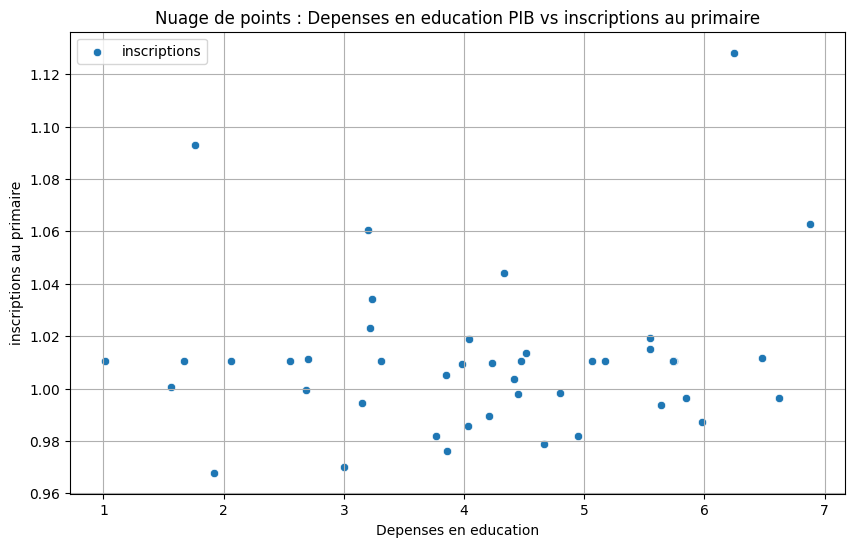

In [65]:
# Créer un nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depenses_en_education_PIB', y='inscriptions au primaire', data=data)

# Ajouter des titres et des labels
plt.title('Nuage de points : Depenses en education PIB vs inscriptions au primaire')
plt.xlabel('Depenses en education')
plt.ylabel('inscriptions au primaire')
plt.legend(['inscriptions'])
plt.grid(True)

# Afficher le graphique
plt.show()

En observant uniquement les points, il n'y a pas de relation évidente. Les points semblent dispersés de manière aléatoire, ce qui suggère une faible ou inexistante corrélation linéaire entre les deux variables.

La majorité des points se trouvent autour de 100% sur l'axe Y, ce qui indique que, dans la plupart des pays, le ratio filles/garçons est proche de l'égalité.

# Étape 4 : Ajustement du modèle de régression linéaire

Un modèle de régression linéaire simple est ajusté en utilisant la méthode des moindres carrés ordinaires (OLS) de la bibliothèque statsmodels.

In [66]:
model = sm.OLS(y, X).fit()

# Étape 5 : Affichage du nuage de points avec la droite de régression

Le nuage de points est affiché avec une droite de régression (en rouge) qui représente la relation linéaire entre Advertisements et les Sales.

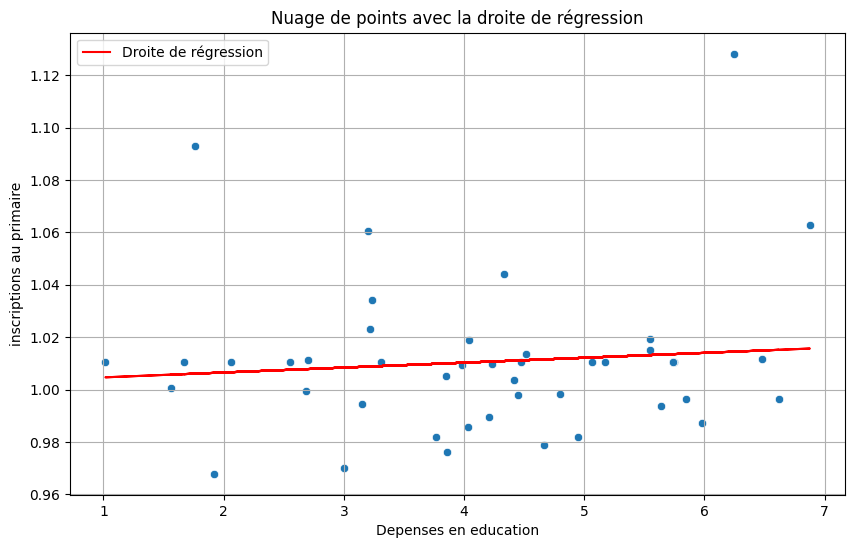

In [67]:
# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Créer le nuage de points avec la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depenses_en_education_PIB', y='inscriptions au primaire', data=data)
plt.plot(data['Depenses_en_education_PIB'], y_pred, color='red', label='Droite de régression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de régression')
plt.xlabel('Depenses en education')
plt.ylabel('inscriptions au primaire')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

Les points sont très éloignés de la droite de régression, ce qui reflète une relation linéaire très faible

# Étape 6 : Tests de régression

Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression :
    -Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus.
    -Le test de White est utilisé pour détecter l'hétéroscédasticité des résidus.
    -Le test de normalité de Shapiro-Wilk est utilisé pour évaluer la normalité des résidus.

In [68]:
# Test de Durbin-Watson
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')

Test de Durbin-Watson: 2.085205643745853


DW=1.7637 :
La valeur est très proche de 2, ce qui suggère que les résidus du modèle de régression n'ont pas d'autocorrélation significative.
Cela est un bon indicateur de validité pour le modèle, car une autocorrélation importante pourrait biaiser les résultats de l'estimation des coefficients.

In [69]:
# Test de White pour l'hétéroscédasticité
white_test = het_white(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))

{'LM statistic': 2.9182687878507436, 'p-value': 0.23243738688931007, 'f-statistic': 1.4563004605469434, 'f p-value': 0.24462608803860333}


Ici, le p-value est supérieur à 0.05, donc nous ne rejetons pas l'hypothèse nulle d'homoscédasticité. Cela signifie qu'il n'y a pas de preuve d'hétéroscédasticité.

In [70]:
# Test de normalité de Shapiro-Wilk 
shapiro_test = stats.shapiro(model.resid)
print(f'Test de Shapiro-Wilk: {shapiro_test}')

Test de Shapiro-Wilk: ShapiroResult(statistic=0.8132222955157115, pvalue=4.705283622899713e-06)


Statistique de test : Une valeur proche de 1 indique que les résidus sont normalement distribués, tandis qu'une valeur plus petite indique une déviation par rapport à la normalité. Ici, la statistique est de 0.8132, ce qui suggère une certaine déviation des résidus par rapport à la normalité.

p-value : Une p-value très faible (inférieure à 0.05) indique que l'hypothèse nulle (les résidus suivent une distribution normale) est rejetée. Dans ce cas, la p-value est 4.7053e-06, ce qui est largement inférieur à 0.05, indiquant qu'il y a une forte preuve statistique que les résidus ne suivent pas une distribution normale.

# Étape 7 : Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [71]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     inscriptions au primaire   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                 -0.014
Method:                       Least Squares   F-statistic:                    0.3865
Date:                      Mon, 23 Dec 2024   Prob (F-statistic):              0.537
Time:                              20:25:30   Log-Likelihood:                 95.352
No. Observations:                        45   AIC:                            -186.7
Df Residuals:                            43   BIC:                            -183.1
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

R-squared (R²) : 0.009, ce qui indique que seulement 0.9% de la variance des inscriptions au primaire est expliquée par les dépenses en éducation en pourcentage du PIB. Cela suggère que le modèle n'explique pas bien la relation entre ces deux variables.

F-statistic : 0.3865 avec une p-value de 0.537. Cela indique que la relation entre les dépenses en éducation et les inscriptions au primaire n'est pas statistiquement significative. En d'autres termes, les dépenses en éducation ne semblent pas avoir un impact notable sur les inscriptions au primaire dans ce modèle.

# Étape 8 : Histogramme des résidus avec courbe de distribution normale

Un histogramme des résidus est affiché pour visualiser leur distribution. Il est superposé avec une courbe de distribution normale pour évaluer la normalité des résidus.

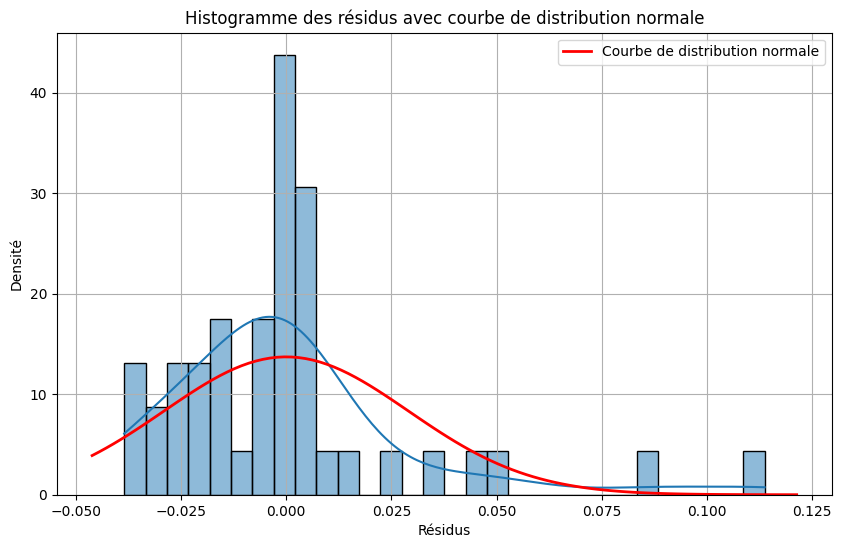

In [72]:
# Calculer les résidus
residus = model.resid

# Créer l'histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, stat="density", bins=30)

# Ajouter une courbe de distribution normale
mu, std = stats.norm.fit(residus)  # Fit de la normale
xmin, xmax = plt.xlim()  # Limites x pour la courbe
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # PDF de la normale
plt.plot(x, p, 'r', linewidth=2, label='Courbe de distribution normale')

# Ajouter des titres et des labels
plt.title('Histogramme des résidus avec courbe de distribution normale')
plt.xlabel('Résidus')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

On observe que les résidus ne suivent pas strictement une distribution normale. La courbe bleue (KDE estimée des résidus) ne s'aligne pas complètement avec la courbe rouge (courbe de distribution normale ajustée). 


# Étape 9 : Calcul de l'Erreur quadratique moyenne (MSE).

Calculez en prenant la moyenne des carrés des écarts entre les valeurs prédites par le modèle de régression et les valeurs réelles de la variable dépendante et interpréter le résultat. (Utilisez la biblio scikit – learn ou bien Numpy)

In [76]:
from sklearn.metrics import mean_squared_error

# Prédire les valeurs de y à partir du modèle
y_pred = model.predict(X)

# Calculer l'Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Erreur Quadratique Moyenne (MSE): {mse}')

Erreur Quadratique Moyenne (MSE): 0.0008453718122705221


Une MSE proche de zéro indique que le modèle fait des prédictions proches des valeurs observées.
La valeur obtenue (0.000845) est relativement faible. Cela suggère que les écarts entre les valeurs prédites et observées sont petits en termes absolus.


# Étape 10 : Coefficient de détermination (R²).

Calculez Le coefficient de détermination R² et interpréter le résultat.

In [78]:
# Coefficient de détermination (R²)
r_squared = model.rsquared
print(f'Coefficient de détermination (R²): {r_squared}')

Coefficient de détermination (R²): 0.008908807336358349


Cela signifie que le modèle explique seulement 0,89 % de la variance dans les données de la variable cible (𝑦, les inscriptions au primaire). Autrement dit, une grande partie de la variation des données reste inexpliquée par les dépenses en éducation (𝑋).

## 2- Analyse via un Test T :
**Question** : Existe-t-il des différences significatives dans les dépenses en éducation entre les pays développés et émergents ?
## Indicateurs sélectionnés :
**Niveau_de_développement** : Catégorie des pays (développés ou émergents).
**Dépenses_en_éducation_PIB** : Part des dépenses publiques allouée à l'éducation en pourcentage du PIB.
## Hypothèses :
**H₀ (Hypothèse nulle)** : Les moyennes des dépenses en éducation (en % du PIB) sont égales entre les pays développés et émergents.
**H₁ (Hypothèse alternative)** : Les moyennes des dépenses en éducation (en % du PIB) ne sont

Diviser les données en deux groupes

In [82]:
group_developped = data[data['Niveau_de_developpement'] == 'Élevé']['Depenses_en_education_PIB']
group_emerging = data[data['Niveau_de_developpement'] != 'Élevé']['Depenses_en_education_PIB']

In [84]:
print('developped :', group_developped.mean()) # On affiche la moyenne de l'échantillon pour les pays développés
print('emerging :', group_emerging.mean()) # On affiche la moyenne de l'échantillon pour les pays émergents

developped : 4.615154981370749
emerging : 3.9954038336866384


In [85]:
# test de normalité avec le test de Shapiro-Wilk
from scipy.stats import shapiro

shapiro_developped = shapiro(group_developped)
shapiro_emerging = shapiro(group_emerging)

print("Shapiro-Wilk test pour les pays développés :", shapiro_developped)
print("Shapiro-Wilk test pour les pays émergents :", shapiro_emerging)

Shapiro-Wilk test pour les pays développés : ShapiroResult(statistic=0.9481887508637791, pvalue=0.57111528549601)
Shapiro-Wilk test pour les pays émergents : ShapiroResult(statistic=0.9637584379222639, pvalue=0.34683122855915866)


Pays développés : pvalue=0.57, on ne rejette pas 𝐻0(les données suivent une distribution normale).
Pays émergents : pvalue=0.34, on ne rejette pas 𝐻0(les données suivent également une distribution normale).
Les deux groupes suivent une distribution normale, ce qui permet d'appliquer le test T de Student.

In [90]:
import scipy.stats as st

t_stat , p_valeur = st.ttest_ind(group_developped, group_emerging) # On fait un test de Student bilateral à 2 échantillons

print('stat=%.3f, p=%.3f' % (t_stat, p_valeur))
alpha = 0.05 # On fixe le seuil de signification à 5%

if p_valeur > alpha:
    print('On accepte H0 : les moyennes sont égales')
else:
    print('On rejette H0 : les moyennes sont différentes')
    


stat=1.275, p=0.209
On accepte H0 : les moyennes sont égales


La p-value=0.209 est supérieure au seuil α=0.05.

Cela signifie que nous ne rejetons pas l’hypothèse nulle (𝐻0).

Il n’y a pas de différence significative entre les moyennes des dépenses en éducation (% PIB) des pays développés et des pays émergents.

Bien que la moyenne des pays développés (4.62 %) soit légèrement supérieure à celle des pays émergents (4.00 %), cette différence n'est pas statistiquement significative.

Cela suggère qu’en termes de dépenses en éducation (% PIB), les pays développés et émergents ne présentent pas une distinction nette dans cet échantillon.

## 3- Analyse via régression linéaire multiple :
**Question** : Quels facteurs contribuent  à la consommation d’énergies renouvelables (% de la consommation totale d’énergie)?
## Indicateurs sélectionnés :
**Consommation d’énergies renouvelables** : Consommation d’énergies renouvelables (% de la consommation totale d’énergie).
**PIB_par_habitant**: e produit intérieur brut (PIB) représente la valeur totale des biens et services produits dans un pays sur une période donnée (généralement une année).
**Accès à l'électricité** : Pourcentage de la population ayant accès à l'électricité.
## Hypothèses :
**H₀ (Hypothèse nulle)** : Aucun des facteurs sélectionnés n’a d’effet significatif sur la consommation d’énergies renouvelables.
**H₁ (Hypothèse alternative)** : Au moins un des facteurs sélectionnés a un effet significatif sur la consommation d’énergies renouvelables.


# Étape 1 : Préparation des Données

1-Importez tous les bibliothèques nécessaires. (par example : numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats...)

In [137]:
import pandas as pd
import matplotlib.pyplot as mb
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


2-Charger les données à partir d'un fichier Excel nommé "data_cleaned.csv" et stockées dans un DataFrame.

In [138]:
data_multible= pd.read_csv('data_cleaned.csv')
data_multible.head()

,Country,PIB_total,"la concentration moyenne annuelle en PM2,5",inscriptions au primaire,Consommation d’énergies renouvelables,PIB_par_habitant,Depenses_en_education_PIB,Esperance_de_vie,Depenses_en_sante_par_habitant,Taux_mortalite_infantile,...,Acces_internet,Croissance_economique,Croissance_PIB_par_habitant,Ratio_dette_PIB,Investissements_directs_etrangers,Emplois_agriculture,Acces_electricite_categorise,Niveau_de_developpement,Acces_eau_potable_categorise,Taux_pauvrete_categorise
0,Afghanistan,1.995593e+10,46.087094,1.01058,18.2,510.787063,5.062039,62.575,80.288055,61.6,...,18.4000,-2.351101,-5.382515,74.400018,0.064994,45.983408,Élevé,Faible,Modéré,Faible
1,Armenia,1.264170e+10,30.579633,1.01115,8.4,4268.680933,2.705560,72.173,552.000000,11.3,...,76.5077,-7.200000,-7.168665,63.401214,0.463409,52.383909,Élevé,Intermédiaire,Élevé,Faible
2,Azerbaijan,4.269300e+10,21.727000,1.04425,1.3,4229.910649,4.332050,66.868,243.000000,19.7,...,84.6000,-4.300000,-4.952702,22.189999,1.187904,36.312789,Élevé,Intermédiaire,Élevé,Faible
3,Bahrain,3.583763e+10,58.495063,1.01058,0.0,24342.844455,2.552375,79.174,1105.324829,6.9,...,99.6710,-5.911363,-5.173074,111.598089,2.849732,0.935136,Élevé,Élevé,Élevé,Faible
4,Bangladesh,3.739794e+11,42.381376,1.09302,27.2,2248.850788,1.765281,71.968,50.664131,31.0,...,36.1091,3.448018,2.586478,74.400018,0.407860,38.123203,Élevé,Faible,Élevé,Faible


# Étape 2 : Sélection des variables.

In [151]:
Y = data_multible["Consommation d’énergies renouvelables"]
X = data_multible[["PIB_par_habitant", "Acces_electricite"]]

# Étape 3 : Nuage de points

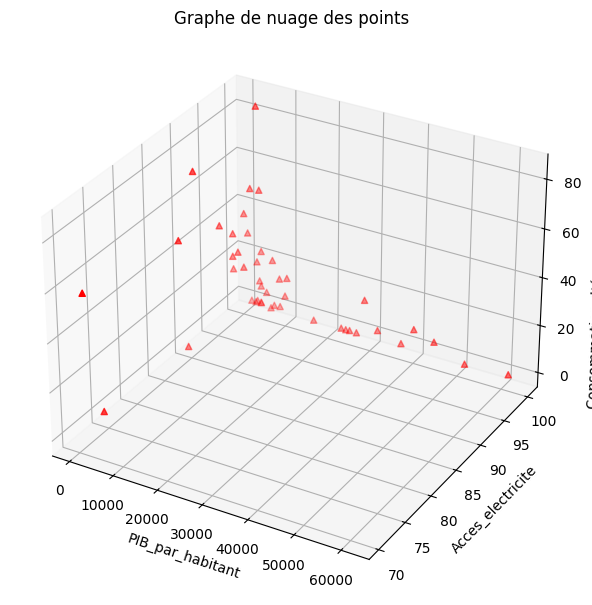

In [152]:
grp = mb.figure(figsize=(16, 10))

ax = grp.add_subplot(121, projection='3d')

ax.scatter(data_multible["PIB_par_habitant"], data_multible["Acces_electricite"], data_multible["Consommation d’énergies renouvelables"], c='r', marker='^')

ax.set_xlabel('PIB_par_habitant')
ax.set_ylabel('Acces_electricite')
ax.set_zlabel('Consommation d’énergies renouvelables')

mb.title('Graphe de nuage des points')

mb.show()


les points semblent former un plan ou une tendance claire, cela suggère une relation entre les variables

# Étape 4 : Ajustement du modèle de régression linéaire

Un modèle de régression linéaire multiple est ajusté en utilisant la méthode des moindres carrés ordinaires (OLS) de la bibliothèque statsmodels.

In [153]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X[["PIB_par_habitant", "Acces_electricite"]])

X = sm.add_constant(X_scaled)
model = sm.OLS(Y, X).fit()
model.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Consommation d’énergies renouvelables   R-squared:                       0.232
Model:                                               OLS   Adj. R-squared:                  0.195
Method:                                    Least Squares   F-statistic:                     6.334
Date:                                   Tue, 24 Dec 2024   Prob (F-statistic):            0.00394
Time:                                           11:54:32   Log-Likelihood:                -195.24
No. Observations:                                     45   AIC:                             396.5
Df Residuals:                                         42   BIC:                             401.9
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4622      2.860      6.105      0.000      11.690      23.235
x1            -7.4604      2.985     -2.500      0.016     -13.483      -1.437
x2            -5.1183      2.985     -1.715      0.094     -11.141       0.905
==============================================================================
Omnibus:                       13.315   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.506
Skew:                           1.025   Prob(JB):                     0.000430
Kurtosis:                       5.016   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared (R²) = 0.232 :
23,2 % de la variabilité dans la consommation d’énergies renouvelables est expliquée par le modèle.
Bien que ce pourcentage soit relativement faible, il indique que d'autres facteurs non inclus pourraient également contribuer significativement.

Prob (F-statistic) = 0.00394 :
Le modèle global est statistiquement significatif au seuil de 5 %, ce qui signifie que les variables explicatives combinées ont un effet sur la consommation d’énergies renouvelables.

# Étape 5 : Affichage du nuage de points avec la droite de régression.

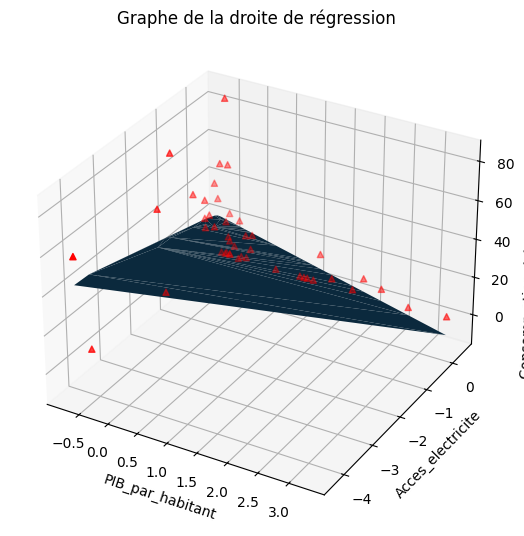

In [142]:
# Effectuez les prédictions
Y_predict = model.predict(X)

# Créez une figure avec une taille personalisée
grp = mb.figure(figsize=(14, 9))

# Ajoute un sous-graphique 3D
ax = grp.add_subplot(1, 2, 1, projection="3d")
                      
# Nuage de points avec Les données réelles 
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], data_multible["Consommation d’énergies renouvelables"], c='r', marker='^')

# Ajoutez des étiquettes aux axes ax. set.
ax.set_xlabel ('PIB_par_habitant')
ax.set_ylabel('Acces_electricite')
ax.set_zlabel('Consommation d’énergies renouvelables')


mb.title('Graphe de la droite de régression')


# Tracé de la surface triangulée avec Les prédictions 
ax.plot_trisurf(X_scaled[:, 0], X_scaled[:, 1], Y_predict)

# Affichez la figure
mb.show()







Les points rouges représentent les données réelles observées de la consommation d’énergies renouvelables en fonction des deux variables explicatives : PIB par habitant (x1) et accès à l'électricité (x2).

Une surface triangulée (bleue ou une couleur par défaut) représente les prédictions issues du modèle de régression linéaire.

# Étape 6 : Tests de régression

Plusieurs tests sont effectués pour évaluer la qualité du modèle de régression : -Le test de Durbin-Watson est utilisé pour détecter l'autocorrélation des résidus. -Le test de White est utilisé pour détecter l'hétéroscédasticité des résidus. -Le test de normalité de Shapiro-Wilk est utilisé pour évaluer la normalité des résidus.
(Interpréter les résultats)

In [143]:
# Test de Durbin-Watson
# Calculez la statistique Durbin-Watson (DW)
dw = sm.stats.stattools.durbin_watson(model.resid)

print(f"Statistique Durbin-Watson (DW) : {dw:.2f}")


Statistique Durbin-Watson (DW) : 1.96


La statistique Durbin-Watson calculée est 1.96, ce qui est proche de 2. Cela suggère qu'il n'y a pas de preuve évidente d'autocorrélation des résidus dans ce modèle. 

In [155]:
# Test de White pour l'hétéroscédasticité

from statsmodels.stats.diagnostic import het_white


# Effectuer le test de white
white_test_statistic, white_test_P_value, fstat, f_P_value = het_white(model.resid, X)


print(f"Statistique de White -- statistique du test : {white_test_statistic: 4f}")
print(f"Statistique de White -- valeur p : {white_test_P_value: 4f}")

if white_test_P_value < 0.05:
     print("hétéroscédasticité détéctée : : la variance des résidus n'est pas constante")
else:
     print("Aucune hétéroscédasticité significative détéctée")


Statistique de White -- statistique du test :  8.273054
Statistique de White -- valeur p :  0.141815
Aucune hétéroscédasticité significative détéctée


La valeur p est supérieure à 0,05 (niveau de signification usuel), ce qui indique que nous ne rejetons pas l'hypothèse nulle d'homoscédasticité.

Cela signifie que la variance des résidus est constante, et il n'y a pas de preuve significative d'hétéroscédasticité dans le modèle.

Le modèle respecte l'une des hypothèses fondamentales de la régression linéaire, à savoir que les résidus ont une variance constante.

# Étape 7 : Résumé du modèle

Le résumé du modèle de régression linéaire est affiché, montrant les coefficients, les statistiques de test et d'autres informations liées au modèle.

In [145]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Ajout d'une constante (intercept) pour le modèle
X = sm.add_constant(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Création du modèle de régression linéaire avec statsmodels
model = sm.OLS(Y_train, X_train)

# Ajustement du modèle
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())


                                      OLS Regression Results                                     
Dep. Variable:     Consommation d’énergies renouvelables   R-squared:                       0.415
Model:                                               OLS   Adj. R-squared:                  0.373
Method:                                    Least Squares   F-statistic:                     9.918
Date:                                   Tue, 24 Dec 2024   Prob (F-statistic):           0.000554
Time:                                           11:30:33   Log-Likelihood:                -130.89
No. Observations:                                     31   AIC:                             267.8
Df Residuals:                                         28   BIC:                             272.1
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                 coe

R-squared = 0.415 :Environ 41,5 % de la variabilité dans la consommation d’énergies renouvelables est expliquée par le PIB par habitant et l'accès à l'électricité.

Adj. R-squared = 0.373 : Ajusté pour le nombre de variables, ce qui le rend légèrement plus conservateur.

F-statistic = 9.918, Prob(F-statistic) = 0.000554 :Le modèle global est statistiquement significatif, indiquant que les variables explicatives ont un effet combiné sur la variable dépendante.

Accès à l'électricité est un facteur significatif, et son impact est négatif sur la consommation d’énergies renouvelables.

PIB par habitant présente une tendance négative, mais cet effet n’est pas statistiquement significatif.

Le modèle capture une part modérée de la variabilité des données (41,5 %), mais une part importante reste inexpliquée.

# Étape 8 : Calcul de l'Erreur quadratique moyenne (MSE) et Erreur Quadratique Moyenne (RMSE).

Calculez en prenant la moyenne des carrés des écarts entre les valeurs prédites par le modèle de régression et les valeurs réelles de la variable dépendante et interpréter le résultat. (Utilisez la biblio scikit – learn ou bien Numpy)

In [156]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prédictions sur l'ensemble de test
Y_predict_test = results.predict(X_test)

# Calcul du Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_predict_test)
print(f"Mean Squared Error (MSE): {mse}")

# Calcul du Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")



Mean Squared Error (MSE): 1494.6968946747934
Root Mean Squared Error (RMSE): 38.66131004861053


Plus le MSE est faible, plus le modèle est précis. Ici, une valeur élevée (1494.70) indique que le modèle présente une erreur moyenne importante dans ses prédictions.

Avec un RMSE de 38.66, cela signifie que les prédictions s'écartent en moyenne de 38,66 % sur l'échelle de la consommation d'énergies renouvelables.

# Étape 8 : Calcul de  Coefficient de détermination (R²).

In [158]:
import numpy as np

# Prédictions sur l'ensemble d'entraînement
Y_train_predict = results.predict(X_train)

# Calcul du SSE (Sum of Squares Error) et SST (Total Sum of Squares)
sse = np.sum((Y_train - Y_train_predict) ** 2)  # Erreur des résidus
sst = np.sum((Y_train - np.mean(Y_train)) ** 2)  # Variance totale

# Calcul du R²
r_squared_manual = 1 - (sse / sst)
print(f'Coefficient de détermination calculé (R²): {r_squared_manual}')


Coefficient de détermination calculé (R²): 0.4146680579336215


R2 =0.4147, ce qui signifie que 41,47 % de la variabilité de la consommation d’énergies renouvelables (Y) est expliquée par les variables indépendantes (X).
Reste de la variabilité :

Environ 58,53 % de la variabilité n'est pas expliquée par le modèle, ce qui indique qu'il existe des facteurs ou des relations non inclus dans l'analyse actuelle.